HOÀNG VĂN CHIẾN

NESTECH PYTHON K29

FINAL TEST

BƯỚC 1: TIỀN SỬ LÝ DỮ LIỆU

In [1]:
# IMPORT Thư viện

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# IMPORT DATA

dataset_path = r"../Chien_PythonK29_Nestech/OnlineRetail.csv"

In [3]:
# READ DATA

# read data as a dataframe
# Chuyển đổi dạng dữ liệu trong file CSV sang kiểu dữ liệu trong Pythons qua mã ISO-8859-1
dataset = pd.read_csv(dataset_path, encoding="ISO-8859-1")

print(dataset)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       0

In [4]:
# NULL CHECK
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#DELETE NULL LINE AND CHECK RECHECK
dataset.dropna(inplace=True)
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
# Thêm cột sales theo công thức Sales = Quantity * UnitPrice

dataset['Sales'] = dataset['Quantity'] * dataset['UnitPrice']

In [6]:
# Tính tổng doanh thu theo mỗi quốc gia
# sử dụng reset_index để đặt lại chỉ số của DataFrame thành một dãy số nguyên tuần tự.

Sales_Country = dataset.groupby(by='Country')['Sales'].sum().reset_index()
Sales_Country

,Country,Sales
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


In [7]:
# Top 10 sales country sort
Sorted_sales_country = Sales_Country.sort_values(by='Sales', ascending=False)
top_10_values = Sorted_sales_country.head(10)
top_10_values

,Country,Sales
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


BƯỚC 2: VẼ BIỂU ĐỒ

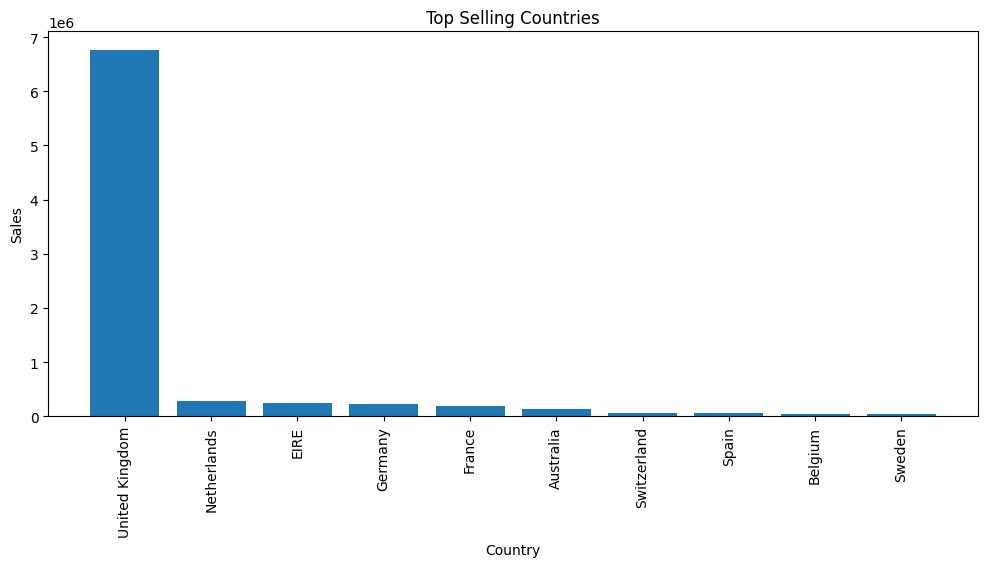

In [9]:
# SHOW CHART
plt.figure(figsize=(12,5))
plt.bar(top_10_values['Country'],top_10_values['Sales'])
plt.title('Top Selling Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical');

Nhận xét về biểu đồ:

Biểu đồ cột này hiển thị thông tin về doanh thu bán hàng của các quốc gia hàng đầu. Các trục x và y của biểu đồ lần lượt là tên các quốc gia và doanh thu tương ứng. Bằng cách so sánh chiều cao của các cột, bạn có thể thấy rõ sự chênh lệch trong doanh thu giữa các quốc gia. 
Theo biểu đồ ta thấy doanh thu bán hàng lớn nhất ở Vương Quốc Anh với sự chênh lệch rõ ràng so với các quốc gia khác


In [8]:
# Thêm cột CustomerId để tính cho từng khách hàng

Ac_ID = dataset.groupby('CustomerID')['InvoiceNo'].count().reset_index()
Ac_ID

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [9]:
# Tính Số lwợng hàng mà khách hàng mua

Ac_ID_Quantity = dataset.groupby('CustomerID')['Quantity'].sum().reset_index()
Ac_ID_Quantity

,CustomerID,Quantity
0,12346.0,0
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197
...,...,...
4367,18280.0,45
4368,18281.0,54
4369,18282.0,98
4370,18283.0,1397


In [10]:
# Tính tổng số tiền khách hàng mua
Ac_ID_Total = dataset.groupby('CustomerID')['Sales'].sum().reset_index()
Ac_ID_Total

,CustomerID,Sales
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


BƯỚC 3: CHUẨN HÓA THÔNG TIN ĐỂ CHUẨN BỊ PHÂN TÍCH
DataFrame Customer2, cho thấy thông tin về khách hàng, tổng số hóa đơn, tổng số lượng hàng hóa và tổng doanh thu cho từng khách hàng.

In [11]:
# Gộp các bảng groupby lại thành 1 bảng theo customerID
Customer1 = pd.merge(Ac_ID, Ac_ID_Quantity, on='CustomerID').reset_index()
Customer2 = pd.merge(Customer1, Ac_ID_Total, on='CustomerID').reset_index()
Customer2.drop(['level_0', 'index'], axis=1, inplace=True)
Customer2.rename(columns={'InvoiceNo': 'Total_Invoice',
                          'Quantity' : 'Total_Quantity',
                          'Sales' : 'Total_Sales'}, inplace=True)

Customer2.head(5)

,CustomerID,Total_Invoice,Total_Quantity,Total_Sales
0,12346.0,2,0,0.00
1,12347.0,182,2458,4310.00
2,12348.0,31,2341,1797.24
3,12349.0,73,631,1757.55
4,12350.0,17,197,334.40


Kiểm tra lại dữ liệu khi sort số lượng mua hàng theo khách hàng

In [12]:
# Sort số lượng mua hàng theo customer

Sorted_Ac_Total = Ac_ID_Total.sort_values(by='Sales', ascending=False)
top_10_customer = Sorted_Ac_Total.head(10)
top_10_customer

x = top_10_customer['CustomerID'].astype(str)
y = top_10_customer['Sales']

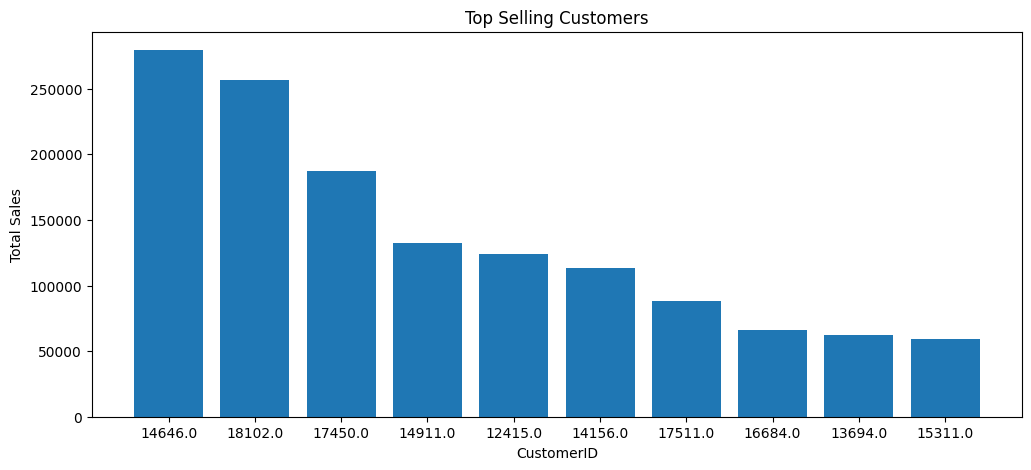

In [13]:
# SHOW CHART
plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.title('Top Selling Customers')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales')
plt.show()

Nhận xét biểu đồ:

Nhìn vào biểu đồ ta có thể đánh giá trực quan được khách hàng có ID nào là người mua hàng nhiều nhất và xác định được số tiền mà khách hàng này đã trả. Ngoài ra biểu đồ đã được sắp xếp theo thứ tự giảm dần cho top 10 khách hàng mua hàng nhiều nhất.

Làm tương tự với mục sản phẩm

In [14]:
# Sort top 10 product

top_10_product = dataset.groupby('StockCode')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(10)
top_10_product

,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221
454,21212,36039
1982,23084,30646
1412,22492,26437
1530,22616,26315
966,21977,24753


In [15]:
top_10_product.reset_index(inplace=True)
top_10_product.drop(['index'], axis=1, inplace=True)
top_10_product

x = top_10_product['StockCode'].astype(str)
y = top_10_product['Quantity']

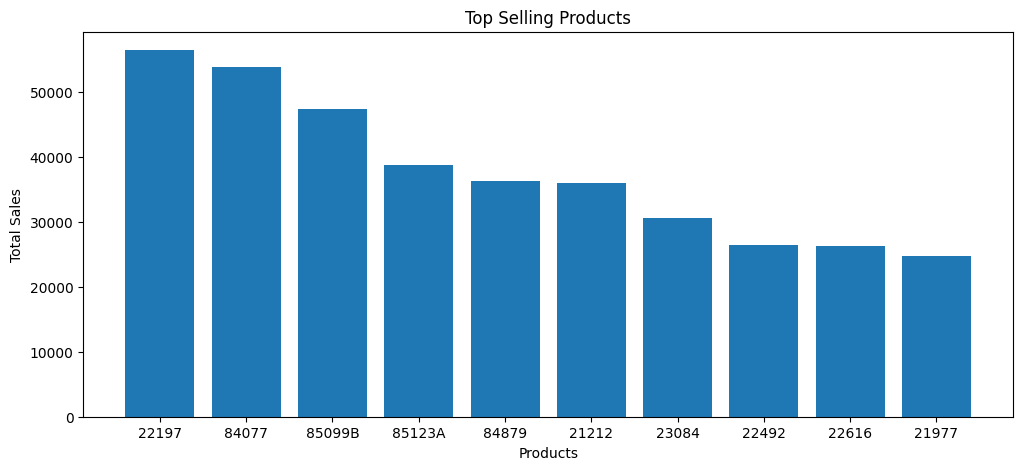

In [16]:
# SHOW CHART
plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.title('Top Selling Products')
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.show()


Nhận xét biểu đồ tương tự với biểu đồ Top 10 khách hàng mua hàng nhiều nhất

In [17]:
# kiểm tra xem tháng nào bán được nhiều nhất
# sử dụng pd.DatetimeIndex() để chuyển cột 'InvoiceDate' từ định dạng dữ liệu chuỗi sang đối tượng thời gian của Pandas, sau đó lấy thông tin về tháng từ các đối tượng thời gian này.

dataset['Month'] = pd.DatetimeIndex(dataset['InvoiceDate']).month
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60,9


In [24]:
# top 10 sales by month

dataset['Month'] = pd.DatetimeIndex(dataset['InvoiceDate']).month
top_sales_month = dataset.groupby('Month')['Sales'].sum().reset_index().sort_values(by='Month')  # Sắp xếp theo tháng

top_10_sales_month = top_sales_month.head(12)

x = top_10_sales_month['Month'].astype(str)
y = top_10_sales_month['Sales']

top_10_sales_month

,Month,Sales
0,1,666383.670
1,2,588718.820
2,3,757679.970
3,4,660149.571
4,5,765153.270
5,6,799112.520
6,7,888950.281
7,8,759822.560
8,9,1045087.582
9,10,989257.070


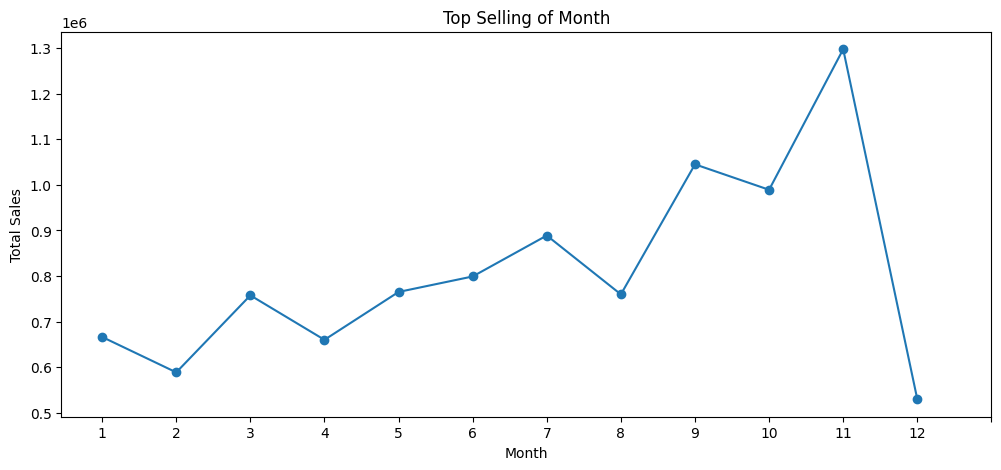

In [26]:
# SHOW CHART
plt.figure(figsize=(12, 5))
plt.plot(x, y, marker='o')
plt.title('Top Selling of Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(0, 13))  # X-axis ticks from 1 to 12
plt.show()

Nhận xét về biểu đồ:

Biểu đồ thể hiện trực quan doanh số bán hàng qua các tháng.
Mặc dù có vẻ doanh số bán hàng tăng giảm theo chu kì hình Sin nhưng
tựu chung doanh số bán hàng trung bình tăng từ đầu năm tới cuối năm.
Tháng 12 có sự sụt giảm rõ rệt(tháng 12 chưa thống kê hết doanh số??)

In [28]:
# top 10 quantity by month

top_quantity_month = dataset.groupby('Month')['Quantity'].sum().reset_index().sort_values(by='Month')  # Sắp xếp theo tháng
top_10_quantity_month = top_quantity_month.head(12) 

x = top_10_quantity_month['Month'].astype(str)
y = top_10_quantity_month['Quantity']

top_10_quantity_month

,Month,Quantity
0,1,362216
1,2,318349
2,3,395899
3,4,366642
4,5,446300
5,6,405689
6,7,491060
7,8,397485
8,9,544027
9,10,512483


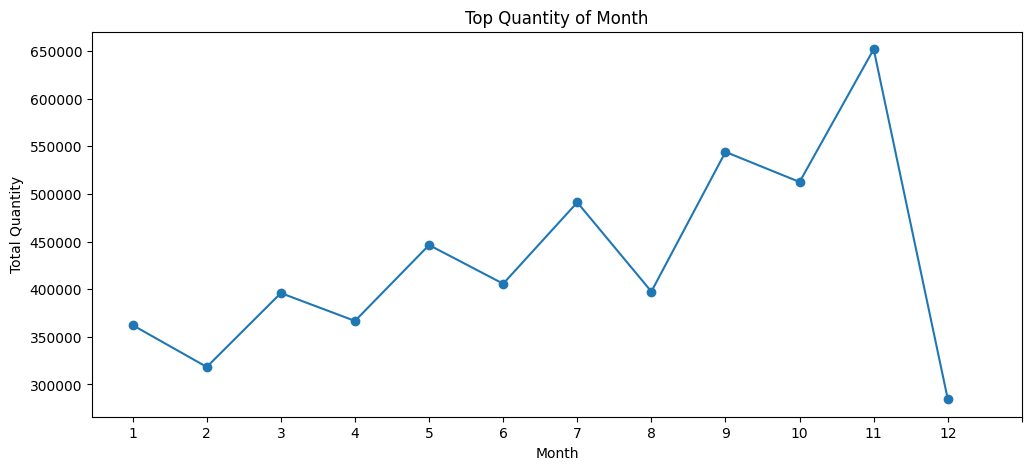

In [30]:
# SHOW CHART
plt.figure(figsize=(12, 5))
plt.plot(x, y, marker='o')
plt.title('Top Quantity of Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(range(0, 13))  # X-axis ticks from 1 to 12
plt.show()

Nhận xét biểu đồ:

Số lượng hàng được bán ra theo từng tháng có xu hướng thay đổi theo chu kì hình Sin, tựu chung số lượng hàng bán ra có xu hướng tăng dần về cuối năm

PHÂN TÍCH DỰA TRÊN MÔ HÌNH  Agglomerative Clustering và DBSCAN:

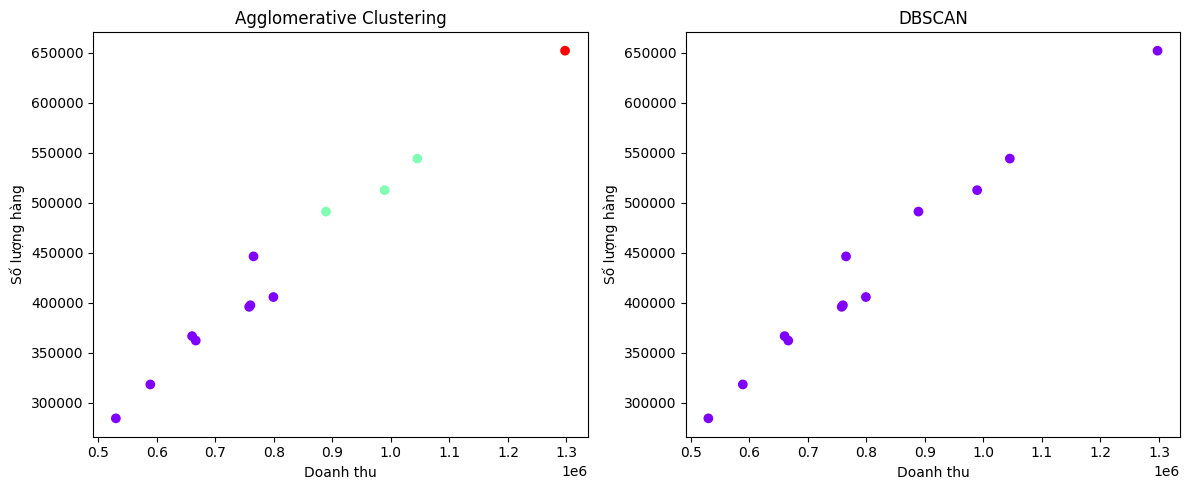

In [40]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# Kết hợp DataFrame top doanh thu và top số lượng hàng
quantity_sales_month = pd.merge(top_10_sales_month, top_10_quantity_month, on='Month')

# Chọn các cột cho phân tích
X = quantity_sales_month[['Sales', 'Quantity']]

# Thực hiện Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X)

# Thực hiện DBSCAN
dbscan = DBSCAN(eps=100, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Tạo subplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['Sales'], X['Quantity'], c=agg_labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Doanh thu')
plt.ylabel('Số lượng hàng')

plt.subplot(1, 2, 2)
plt.scatter(X['Sales'], X['Quantity'], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN')
plt.xlabel('Doanh thu')
plt.ylabel('Số lượng hàng')

plt.tight_layout()
plt.show()


Nhìn vào biểu đồ ta có thể nhận xét thấy 
+ Doanh thu tăng theo số lượng hàng được bán ra
+ Doanh thu tăng theo xu hướng tuyến tính, không có bước nhảy vọt rõ rệt
+ Trong vùng 400000 mặt hàng được bán ra: doanh thu có sự thay đổi không ổn định

DỰ ĐOÁN TÌNH HUỐNG MẶT SỐ LƯỢNG HÀNG BÁN TĂNG GẤP ĐÔI

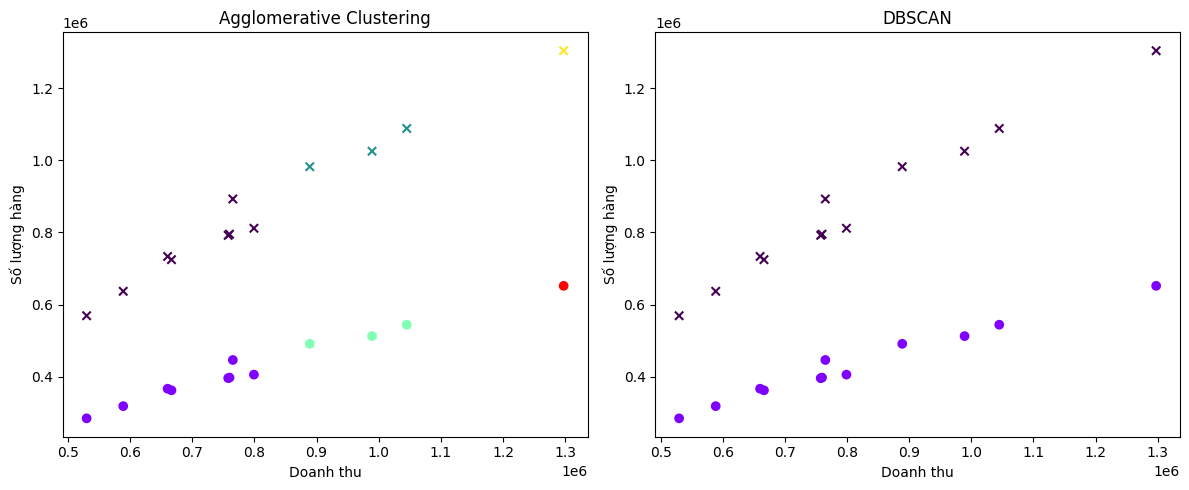

In [47]:
# Sử dụng dữ liệu hiện tại để điều chỉnh mô hình
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X)

dbscan = DBSCAN(eps=100, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Tạo tình huống mới với số lượng hàng tăng gấp đôi
new_quantity = X['Quantity'] * 2
new_data = pd.DataFrame({'Sales': X['Sales'], 'Quantity': new_quantity})

# Dự đoán cụm cho tình huống mới
new_agg_labels = agg_cluster.fit_predict(new_data)  
new_dbscan_labels = dbscan.fit_predict(new_data)  

# Tạo biểu đồ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X['Sales'], X['Quantity'], c=agg_labels, cmap='rainbow')
plt.scatter(new_data['Sales'], new_data['Quantity'], c=new_agg_labels, cmap='viridis', marker='x')
plt.title('Agglomerative Clustering')
plt.xlabel('Doanh thu')
plt.ylabel('Số lượng hàng')

plt.subplot(1, 2, 2)
plt.scatter(X['Sales'], X['Quantity'], c=dbscan_labels, cmap='rainbow')
plt.scatter(new_data['Sales'], new_data['Quantity'], c=new_dbscan_labels, cmap='viridis', marker='x')
plt.title('DBSCAN')
plt.xlabel('Doanh thu')
plt.ylabel('Số lượng hàng')

plt.tight_layout()
plt.show()


Ta có thể nhận thấy góc độ của đường doanh thu tăng lên khi số lượng hàng được bán gia tăng lên